In [1]:
getwd()

[1] "C:/Users/Kevin/Downloads"

In [2]:
walmart_data=read.csv('walmart_data.csv')
walmart_features=read.csv('walmart_features.csv')

In [3]:
head(walmart_data)

,Store,Dept,Date,Weekly_Sales,IsHoliday
,<int>,<int>,<chr>,<dbl>,<lgl>
1,1,1,2010-02-05,24924.50,FALSE
2,1,1,2010-02-12,46039.49,TRUE
3,1,1,2010-02-19,41595.55,FALSE
4,1,1,2010-02-26,19403.54,FALSE
5,1,1,2010-03-05,21827.90,FALSE
6,1,1,2010-03-12,21043.39,FALSE


In [4]:
head(walmart_features)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,1,2010-02-05,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE
2,1,2010-02-12,38.51,2.548,NA,NA,NA,NA,NA,211.2422,8.106,TRUE
3,1,2010-02-19,39.93,2.514,NA,NA,NA,NA,NA,211.2891,8.106,FALSE
4,1,2010-02-26,46.63,2.561,NA,NA,NA,NA,NA,211.3196,8.106,FALSE
5,1,2010-03-05,46.50,2.625,NA,NA,NA,NA,NA,211.3501,8.106,FALSE
6,1,2010-03-12,57.79,2.667,NA,NA,NA,NA,NA,211.3806,8.106,FALSE


In [5]:
n_rows=nrow(walmart_data)
n_rows

[1] 421570

In [6]:
rows_per_store =table(walmart_data$Store) #counting rows by store
rows_per_store


    1     2     3     4     5     6     7     8     9    10    11    12    13 
10244 10238  9036 10272  8999 10211  9762  9895  8867 10315 10062  9705 10474 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
10040  9901  9443  9864  9859 10148 10214  9582  9688 10050 10228  9804  9854 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
10225 10113  9455  7156 10142 10202  6487 10224  9528  6222  7206  7362  9878 
   40    41    42    43    44    45 
10017 10088  6953  6751  7169  9637 

In [7]:
rows_per_store=as.data.frame(rows_per_store)
rows_per_store

Var1,Freq
<fct>,<int>
1,10244
2,10238
3,9036
4,10272
5,8999
6,10211
7,9762
8,9895
9,8867


In [8]:
aggregate(x=walmart_data$Store, by=list(walmart_data$Store), FUN=length)

Group.1,x
<int>,<int>
1,10244
2,10238
3,9036
4,10272
5,8999
6,10211
7,9762
8,9895
9,8867


In [9]:
#Which store has the most rows
as.character(rows_per_store[order(-rows_per_store$Freq),'Var1'][1])

[1] "13"

In [10]:
#Summing up the Total sales by store
sums_by_store=aggregate(
    x=walmart_data$Weekly_Sales,
    by=list(walmart_data$Store), 
    FUN=sum
)
sums_by_store

Group.1,x
<int>,<dbl>
1,222402809
2,275382441
3,57586735
4,299543953
5,45475689
6,223756131
7,81598275
8,129951181
9,77789219


In [11]:
colnames(sums_by_store) <- c('store_number','total_sales')

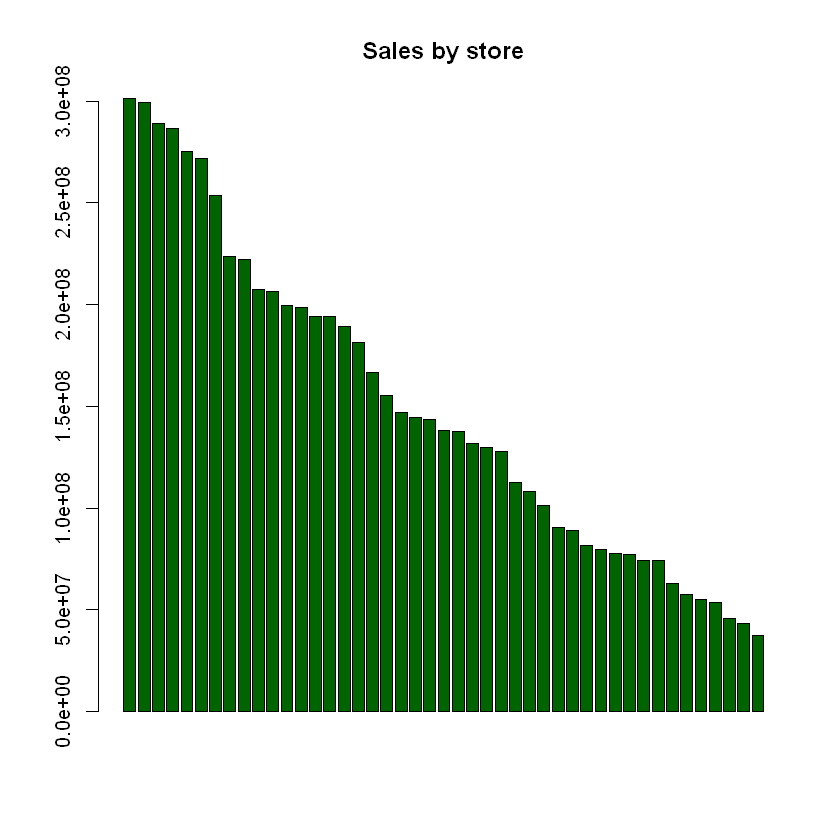

In [12]:
barplot(sums_by_store[order(-sums_by_store$total_sales),'total_sales'],
       main='Sales by store', col='darkgreen')

In [13]:
#mean of every column
sapply(walmart_features, mean)

Warning message in mean.default(X[[i]], ...):
"argument is not numeric or logical: returning NA"


Store         Date  Temperature   Fuel_Price    MarkDown1    MarkDown2 
 23.00000000           NA  59.35619780   3.40599182           NA           NA 
   MarkDown3    MarkDown4    MarkDown5          CPI Unemployment    IsHoliday 
          NA           NA           NA           NA           NA   0.07142857

In [14]:
(
mean(walmart_features$CPI, na.rm = TRUE)
/
sd(walmart_features$CPI, na.rm=TRUE)
)

[1] 4.339909

In [15]:
mean(walmart_features$CPI, na.rm = TRUE)

[1] 172.4608

In [16]:
sd(walmart_features$CPI, na.rm=TRUE)

[1] 39.73835

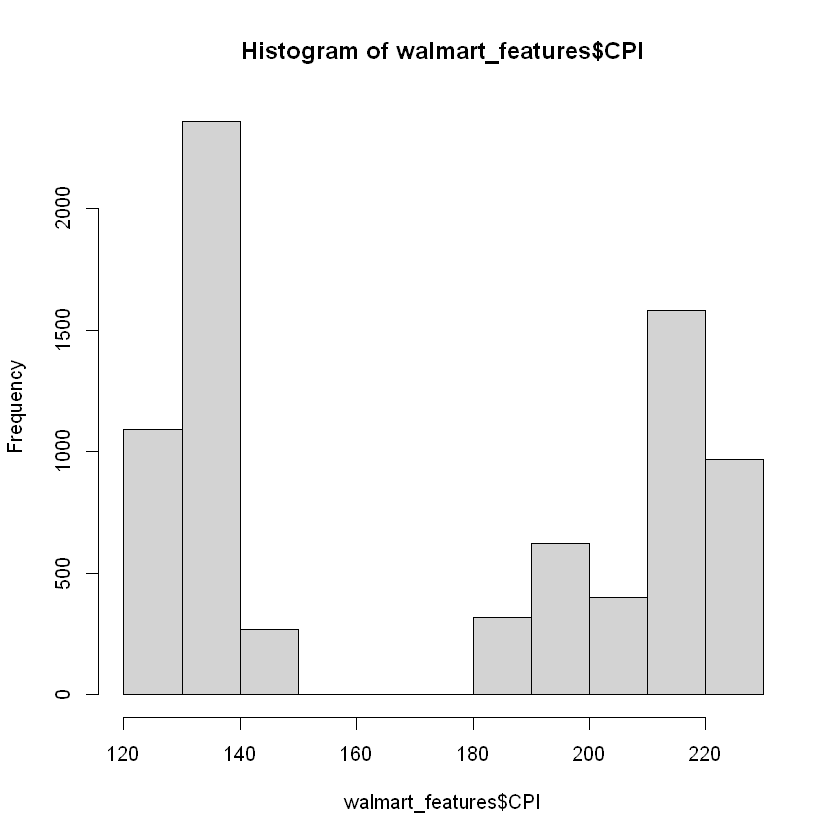

In [17]:
hist(walmart_features$CPI)

In [18]:
walmart_features$CPI_Stand= (
    (walmart_features$CPI- mean(walmart_features$CPI, na.rm = TRUE))/
    sd(walmart_features$CPI,  na.rm=TRUE)
)

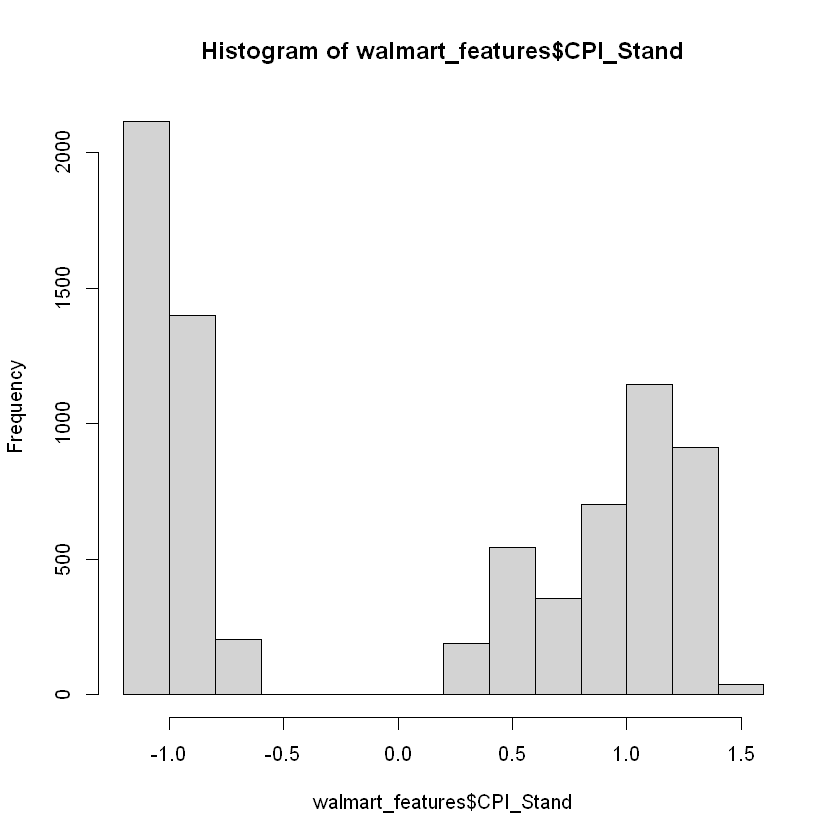

In [19]:
hist(walmart_features$CPI_Stand)

In [20]:
store_1=walmart_data[walmart_data$Store==1,]
store_1_total=aggregate(x = store_1$Weekly_Sales, by = list(store_1$Date), FUN = sum,na.rm = TRUE )
head(store_1_total)

,Group.1,x
,<chr>,<dbl>
1,2010-02-05,1643691
2,2010-02-12,1641957
3,2010-02-19,1611968
4,2010-02-26,1409728
5,2010-03-05,1554807
6,2010-03-12,1439542


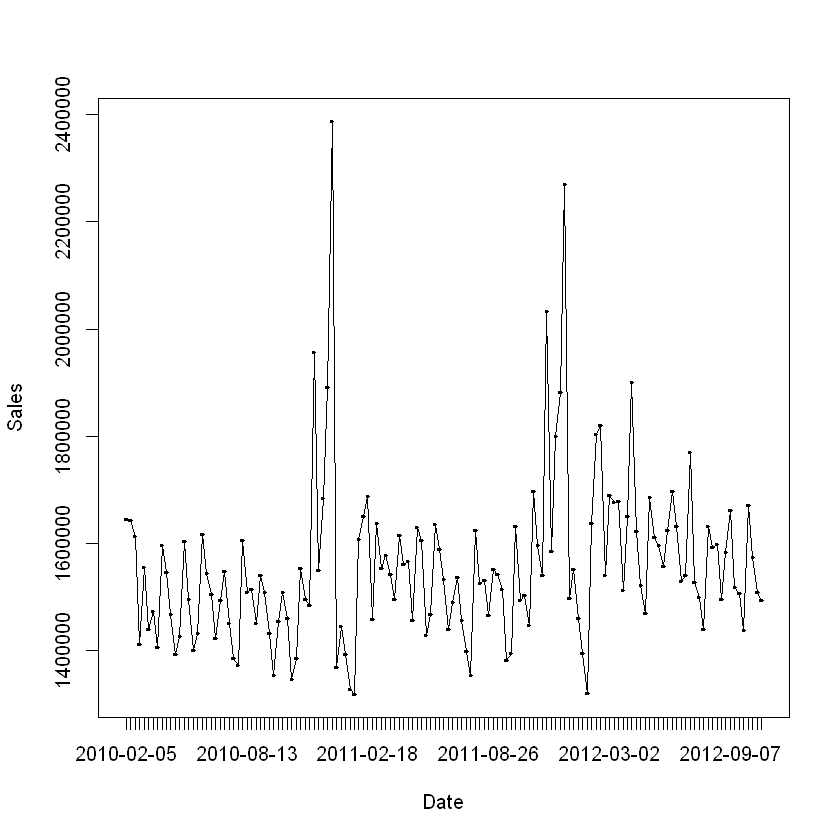

In [27]:
plot( 
    x=as.factor(store_1_total$Group.1),
    y=store_1_total$x,
    xlab='Date',
    ylab='Sales'
)
lines( 
    x=as.factor(store_1_total$Group.1),
    y=store_1_total$x,
)

In [35]:
store_20=walmart_data[walmart_data$Store==20,]
store_20_total=aggregate(x = store_20$Weekly_Sales, by = list(store_20$Date), FUN = sum,na.rm = TRUE )
head(store_20_total)

,Group.1,x
,<chr>,<dbl>
1,2010-02-05,2401395
2,2010-02-12,2109108
3,2010-02-19,2161550
4,2010-02-26,1898194
5,2010-03-05,2119214
6,2010-03-12,2010975


In [36]:
library(ggplot2)

In [42]:
class(store_20_total$x)

[1] "numeric"

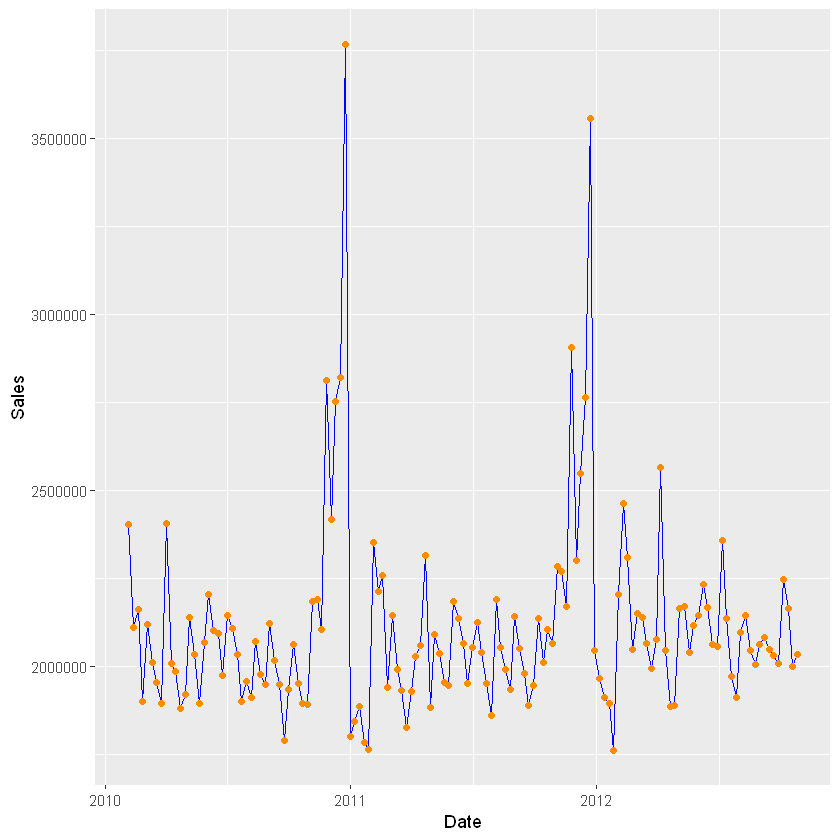

In [50]:
ggplot(
    data=store_20_total,
    aes(x=as.Date(Group.1), y=x, group=1)
)+geom_line(color='blue') +geom_point(color='darkorange') +ylab('Sales') + xlab('Date')

In [70]:
sale=aggregate(walmart_data$Weekly_Sale, by=list(walmart_data$Store), FUN = sum)
top_5_sale=tail(sale[order(sale$x),],5)
top_5_sale

,Group.1,x
,<int>,<dbl>
2,2,275382441
13,13,286517704
14,14,288999911
4,4,299543953
20,20,301397792


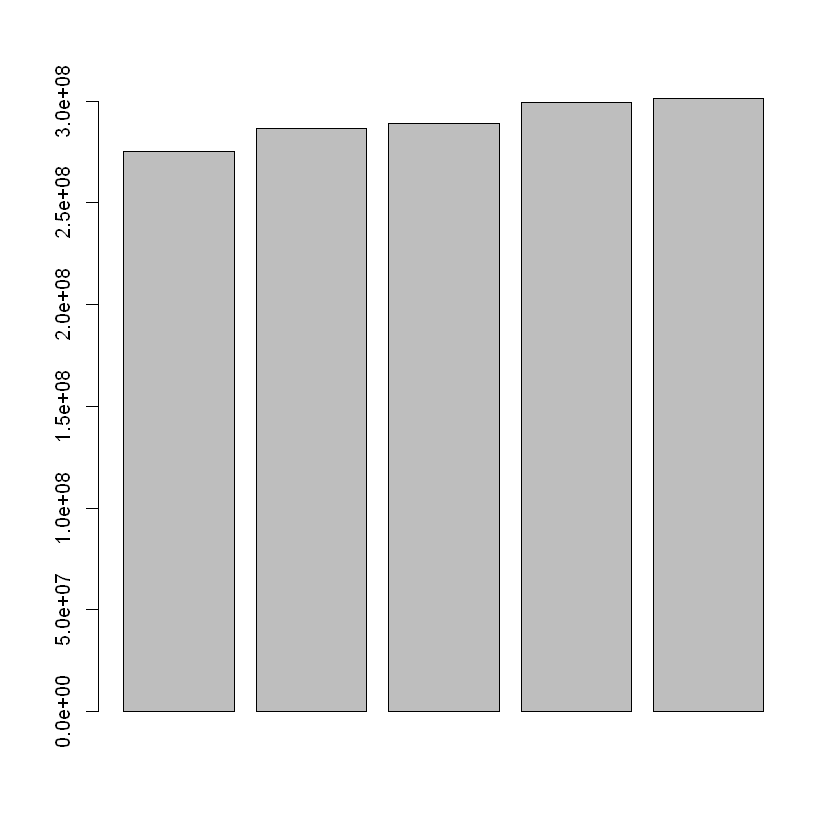

In [74]:
barplot(height =top_5_sale$x)

In [83]:
store_2=walmart_data[walmart_data$Store ==2,]
sales_by_department = aggregate(
    x=store_2$Weekly_Sales,
    by=list(store_2$Dept),
    FUN=sum
)
top_5_dept =sales_by_department[order(-sales_by_department$x), 'Group.1'][1:5]
top_5_dept

[1] 92 95 90 38 91

In [87]:
top_5_dept_sales=store_2[store_2$Dept %in% top_5_dept,]
top_5_dept_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
,<int>,<int>,<chr>,<dbl>,<lgl>
15363,2,38,2010-02-05,113144.90,FALSE
15364,2,38,2010-02-12,100344.36,TRUE
15365,2,38,2010-02-19,93181.36,FALSE
15366,2,38,2010-02-26,109233.51,FALSE
15367,2,38,2010-03-05,116410.09,FALSE
15368,2,38,2010-03-12,172794.20,FALSE
15369,2,38,2010-03-19,98552.33,FALSE
15370,2,38,2010-03-26,96659.43,FALSE
15371,2,38,2010-04-02,96264.28,FALSE


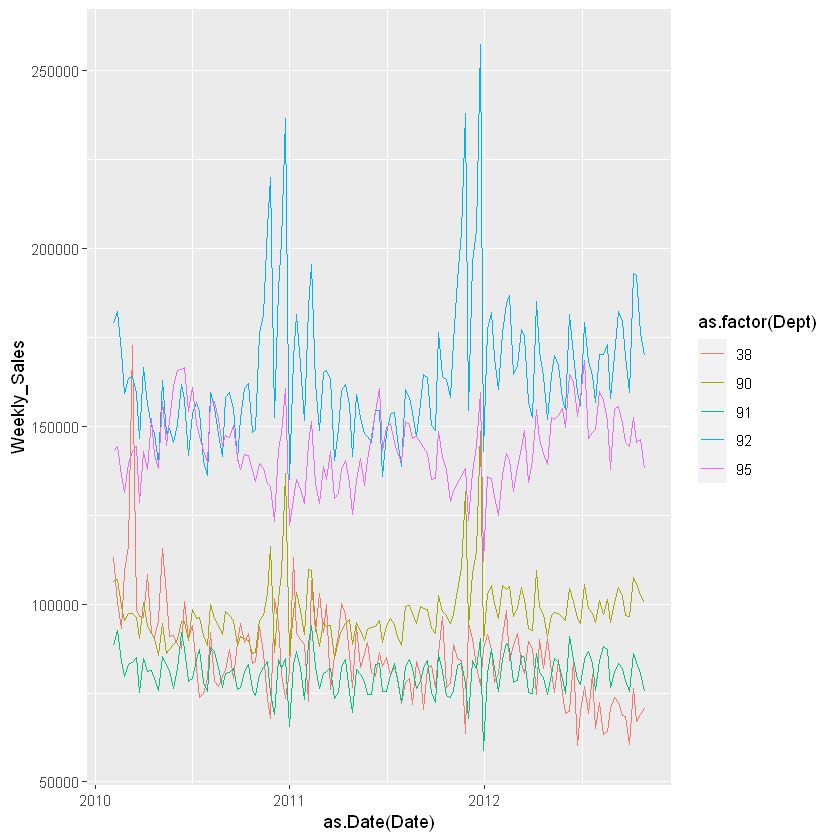

In [91]:
ggplot(
    data=top_5_dept_sales,
    aes(x=as.Date(Date), y=Weekly_Sales, group=Dept, color=as.factor(Dept))
) + geom_line()